# Pymaceuticals Inc.
---

### Analysis - Emily Boulware

- When comparing the four treatment regimens with the lowest SEM (Capomulin, Ramicane, Infubinol and Ceftamin), it appears that Capomulin and Ramicane reduce tumor volume far better than Infubinol or Ceftamin. 

- Interestingly, when isolating Mouse ID "i509" under the Capomulin treatment regimen we see tumor volume drastically reduce between days 20-35; however, tumor volume began increasing from days 35-45. Further investigation would be required to determine Capomulin's longterm efficacy. 

- While mouse weight (g) was considered for the Capomulin treatment regimen summaries, mouse age (months) and mouse sex were not. Additional summaries would be needed to see if there is any relation between mouse age, sex and Capomulin's efficacy on tumor volume.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read the study files and set up one DataFrame

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Finding the number of mice in the study

number_mice = len(mouse_study_df["Mouse ID"].unique())
number_mice

249

In [4]:
# Find the duplicate mouse that shows up in Mouse ID and Timepoint

duplicate_mouse = mouse_study_df.loc[mouse_study_df.duplicated(subset=[
    "Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Show the data for the duplicate Mouse ID from the study

duplicate_mouse_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create new DataFrame removing the duplicate mouse

clean_mouse_study = mouse_study_df.loc[(mouse_study_df["Mouse ID"] != "g989")]
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Making sure the number of mice in the study has reduced by 1 to confirm the
# duplicate mouse was removed

number_mice_clean = len(clean_mouse_study["Mouse ID"].unique())
number_mice_clean

248

# Summary Statistics

In [8]:
# Table displaying mean, median, variance, standard deviation & SEM of tumor volume by Drug Regimen

mean_drug_reg = clean_mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_drug_reg = clean_mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_drug_reg = clean_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_drug_reg = clean_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_drug_reg = clean_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_drug_reg, "Median Tumor Volume": median_drug_reg,"Tumor Volume Variance": var_drug_reg, "Tumor Volume Std. Dev.": std_drug_reg, "Tumor Volume Std. Err": sem_drug_reg})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# This seems to be an optional table to create for the assignment, but just in case it is required here is the 
# same summary statistics table produced on a single line

summary_statistics_agg = clean_mouse_study.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg([
    "mean", "median","var", "std", "sem"])

summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

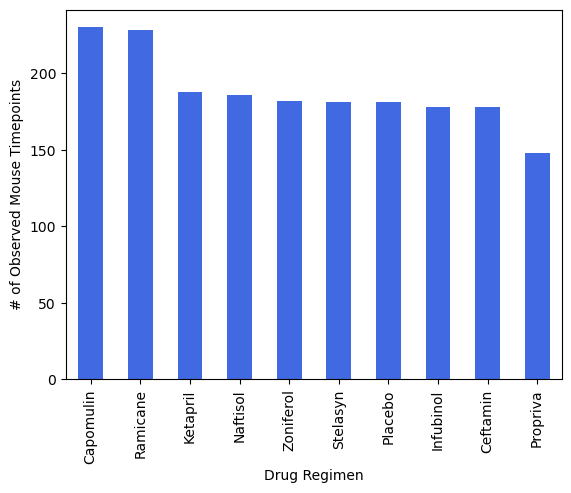

In [10]:
# Bar plot showing total number of Timepoints for each drug regimen using Pandas

timepoint_bar = clean_mouse_study["Drug Regimen"].value_counts().plot.bar(
    color="royalblue", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

plt.show()

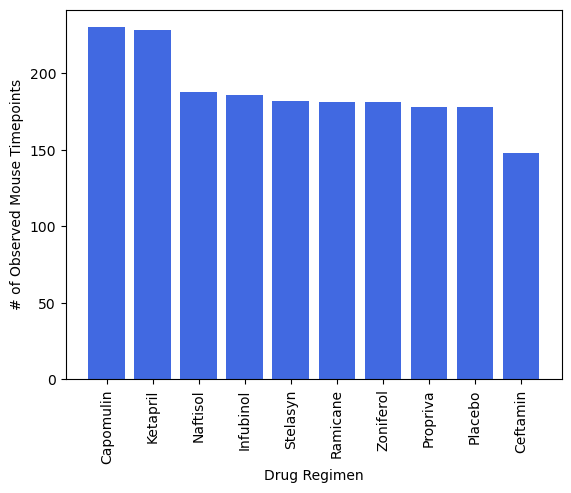

In [11]:
# Bar plot showing total number of Timepoints for each drug regimen using Pyplot

bar_yaxis = clean_mouse_study["Drug Regimen"].value_counts()
bar_xaxis = np.arange(len(bar_yaxis))

plt.bar(bar_xaxis, bar_yaxis, color="royalblue")

tick_locations = [value for value in bar_xaxis]
plt.xticks(tick_locations, clean_mouse_study["Drug Regimen"].unique(), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

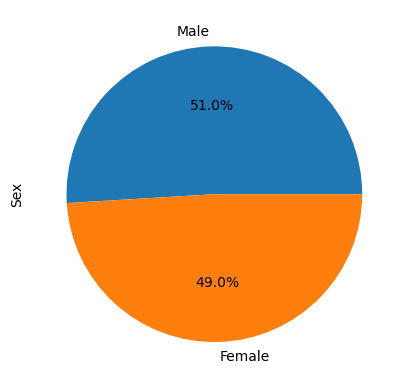

In [12]:
# Pie plot displaying percentage of female vs. male mice using Pandas

female_male_pie = clean_mouse_study["Sex"].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

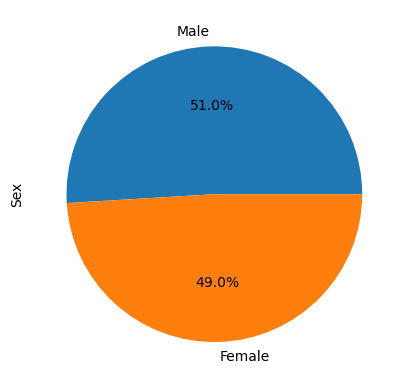

In [13]:
# Pie plot displaying percentage of female vs. male mice using Pyplot

plt.pie(clean_mouse_study["Sex"].value_counts(), autopct="%1.1f%%", labels=["Male", "Female"])
plt.ylabel("Sex")
plt.show()


# Quartiles, Outliers and Boxplots

In [14]:
# Final tumor volume of each mouse for these treatment regimens:
# Capomulin, Ramicane, Infubinol and Ceftamin

# Gathering last timepoint for each mouse in a new DataFrame and then merging with original DataFrame

timepoint_max = pd.DataFrame(clean_mouse_study.groupby(["Mouse ID"])["Timepoint"].max())
timepoint_max_merge = pd.merge(timepoint_max, clean_mouse_study, on=["Mouse ID", "Timepoint"])

In [15]:
# Treatment regimen list & empty list to fill with tumor volume data

treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

# Determining any potential outliers by calculating the IQR

for treatment in treatment_regimen:
    regimen = timepoint_max_merge.loc[timepoint_max_merge["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volume.append(regimen)

    quartiles = regimen.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"{treatment}'s potential outliers: any value below {lower_bound} and above {upper_bound}")


Capomulin's potential outliers: any value below 20.70456164999999 and above 51.83201549
Ramicane's potential outliers: any value below 17.912664470000003 and above 54.30681135
Infubinol's potential outliers: any value below 36.83290494999999 and above 82.74144559000001
Ceftamin's potential outliers: any value below 25.355449580000002 and above 87.66645829999999


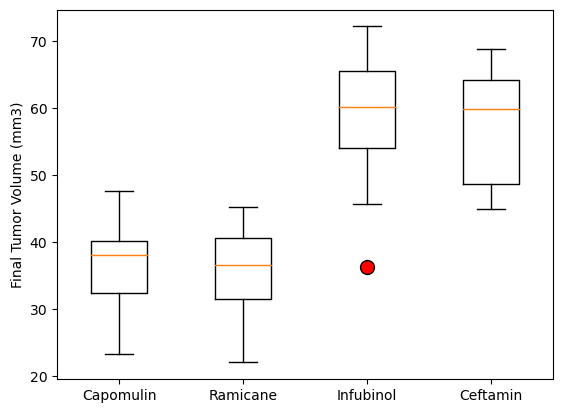

In [16]:
# Box plot showing the distribution of tumor value for each treatment regimen

flierprops = dict(marker="o", markerfacecolor="red", markeredgecolor="black", markersize="10")
plt.boxplot(tumor_volume, labels=treatment_regimen, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

# Line and Scatter Plots

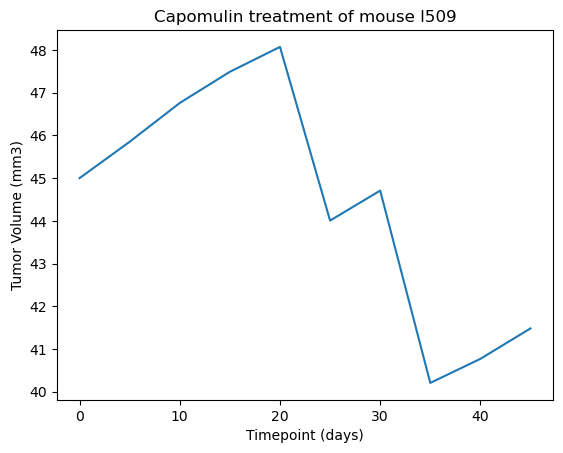

In [17]:
# Line plot showing tumor volume vs. timpoint for mouse l509 treated with Capomulin

l509_capomulin = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]["Timepoint"]
l509_tumor = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]["Tumor Volume (mm3)"]

plt.plot(l509_capomulin, l509_tumor)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

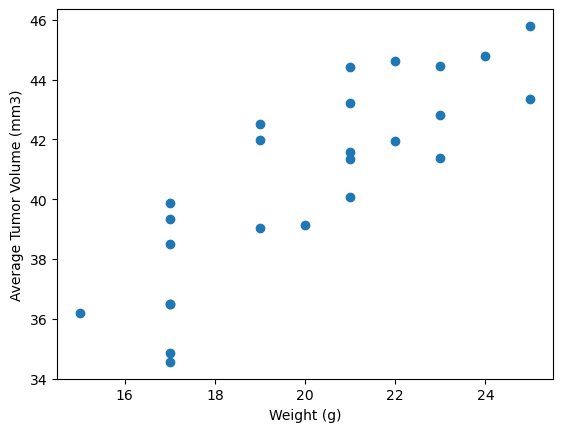

In [18]:
# Scatter plot of mouse weight vs. average observed tumor volume for entire Capomulin regimen

entire_Capomulin = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin", :]
avg_Capomulin_tumor = entire_Capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(avg_Capomulin_tumor["Weight (g)"], avg_Capomulin_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


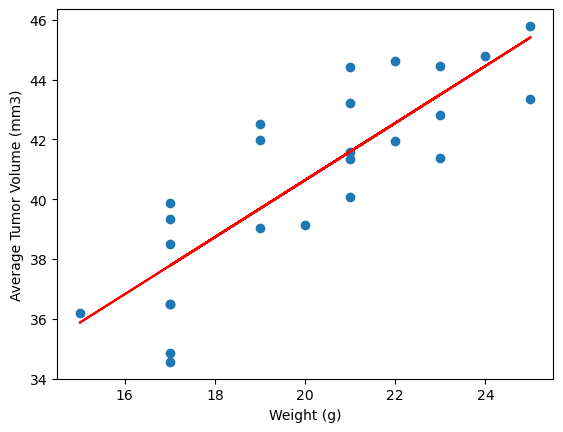

In [19]:
# Calculating correlation coefficient and linear regression model for above Capomulin regimen

correlation = round(st.pearsonr(avg_Capomulin_tumor["Weight (g)"], avg_Capomulin_tumor["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(
    avg_Capomulin_tumor["Weight (g)"], avg_Capomulin_tumor["Tumor Volume (mm3)"])
regress_values = slope * (avg_Capomulin_tumor["Weight (g)"]) + intercept
plt.plot(avg_Capomulin_tumor["Weight (g)"], regress_values, color="r")
plt.scatter(avg_Capomulin_tumor["Weight (g)"], avg_Capomulin_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()